In [169]:
#This notebook will be used to explore and understand the 200000 Amazon Reviews Data set

import pandas as pd
import matplotlib.pyplot as plt
import csv
from os import path
from ast import literal_eval
from difflib import SequenceMatcher

# What type of data do we have?
## Getting to know the dataset from a global standpoint

In [134]:
# Getting importing the csv and checking contents
filepath = path.join("..", "datasets", "data", "amz200k_processed.csv.bak")

reviewsDF = pd.read_csv(filepath, encoding="utf-8")

reviewsDF.head()

,Unnamed: 0,Review Time,Item ID,Rating,Summary,Categories,Review Text
0,0,"07 8, 2014",I948571311,5.0,"Cute, retro dress!","[['Clothing, Shoes & Jewelry', 'Women'], ['Clo...",Beautiful red dress! Material is a little thin...
1,1,"12 26, 2012",I543938031,5.0,Great coat and great price,"[['Clothing, Shoes & Jewelry', 'Men', 'Surf, S...",I got this color for a very good price ($119)....
2,2,"12 15, 2013",I506749476,4.0,"Cute, good buy","[['Clothing, Shoes & Jewelry', 'Women'], ['Clo...","I have a very slender shape, size 1, and this ..."
3,3,"07 19, 2013",I969695447,5.0,Very Versatile Wallet for the man in your life,"[['Clothing, Shoes & Jewelry', 'Men', 'Accesso...",My boyfriend needed a new wallet for his birth...
4,4,"04 12, 2013",I225955774,5.0,compared to A&F Super Skinny 0S,"[['Clothing, Shoes & Jewelry', 'Women', 'Cloth...",I bought 3 pairs which are very different. Ind...


In [135]:
# Getting rid of extra column 'Unnamed: 0'

reviewsDF.drop(reviewsDF.columns[0], axis=1, inplace=True)

reviewsDF.head()


,Review Time,Item ID,Rating,Summary,Categories,Review Text
0,"07 8, 2014",I948571311,5.0,"Cute, retro dress!","[['Clothing, Shoes & Jewelry', 'Women'], ['Clo...",Beautiful red dress! Material is a little thin...
1,"12 26, 2012",I543938031,5.0,Great coat and great price,"[['Clothing, Shoes & Jewelry', 'Men', 'Surf, S...",I got this color for a very good price ($119)....
2,"12 15, 2013",I506749476,4.0,"Cute, good buy","[['Clothing, Shoes & Jewelry', 'Women'], ['Clo...","I have a very slender shape, size 1, and this ..."
3,"07 19, 2013",I969695447,5.0,Very Versatile Wallet for the man in your life,"[['Clothing, Shoes & Jewelry', 'Men', 'Accesso...",My boyfriend needed a new wallet for his birth...
4,"04 12, 2013",I225955774,5.0,compared to A&F Super Skinny 0S,"[['Clothing, Shoes & Jewelry', 'Women', 'Cloth...",I bought 3 pairs which are very different. Ind...


In [136]:
# Getting summary statistics to get an idea of the composition of the dataset
reviewsDF.describe(include='all')

,Review Time,Item ID,Rating,Summary,Categories,Review Text
count,1400,1400,1400.000000,1400,1400,1400
unique,676,1309,NaN,1299,813,1400
top,"01 23, 2014",I784582779,NaN,Perfect,"[['Clothing, Shoes & Jewelry', 'Women'], ['Clo...",They came on time. I ordered them in black in ...
freq,8,4,NaN,7,23,1
mean,NaN,NaN,4.199286,NaN,NaN,NaN
std,NaN,NaN,1.147892,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN


## Let's clean the data a little
Let's change the contents of the column categories from a raw string representing a list of lists to a single string with a ; separating unique values. 

In [137]:
# Not the most effecient code, but it does the job with a small set of data
# Step 1: Do a for loop for every row in the dataframe and extract the row
# Step 2: Turn the raw list of lists into the actual Python Object
# Step 3: Iterate over the list of lists until you get the strings representing the actual categories
# Step 3a: [[Set of Categories 1] , [Set of Categories 2], etc]
# Step 3b: [Set of Categories 1] -> ['Category 1 of set 1', 'Category 2 of set 1']
# Step 4: save the categories into a dictionary to ensure we only keep unique values
# Step 5: Export the values of the dictionary into a single string
# Step 6: Update the original dataframe with the final string

# This is purely aesthetic for I/O purposes
size = len(reviewsDF['Item ID'].values.tolist()) -1


# Step 1
for index, row in reviewsDF.iterrows():
    print(f"Processing {index} of {size}")
    rowDict = dict()
    rowString = ""
    
    #Step 2
    rowList = literal_eval(row[4])
    
    # Steps 3 and 4
    for innerList in rowList:
        for cat in innerList:
            rowDict[cat] = cat
    
    #Step 5
    for value in rowDict.values():
        rowString=rowString.strip()+"#!#"+value.strip()
        
    # Getting rid of the extra ; at the end of the string
    rowString = rowString[3:]
    
    # Step 6
    reviewsDF.loc[reviewsDF['Categories'] == row[4], 'Categories'] = rowString

Processing 0 of 1399
Processing 1 of 1399
Processing 2 of 1399
Processing 3 of 1399
Processing 4 of 1399
Processing 5 of 1399
Processing 6 of 1399
Processing 7 of 1399
Processing 8 of 1399
Processing 9 of 1399
Processing 10 of 1399
Processing 11 of 1399
Processing 12 of 1399
Processing 13 of 1399
Processing 14 of 1399
Processing 15 of 1399
Processing 16 of 1399
Processing 17 of 1399
Processing 18 of 1399
Processing 19 of 1399
Processing 20 of 1399
Processing 21 of 1399
Processing 22 of 1399
Processing 23 of 1399
Processing 24 of 1399
Processing 25 of 1399
Processing 26 of 1399
Processing 27 of 1399
Processing 28 of 1399
Processing 29 of 1399
Processing 30 of 1399
Processing 31 of 1399
Processing 32 of 1399
Processing 33 of 1399
Processing 34 of 1399
Processing 35 of 1399
Processing 36 of 1399
Processing 37 of 1399
Processing 38 of 1399
Processing 39 of 1399
Processing 40 of 1399
Processing 41 of 1399
Processing 42 of 1399
Processing 43 of 1399
Processing 44 of 1399
Processing 45 of 139

Processing 402 of 1399
Processing 403 of 1399
Processing 404 of 1399
Processing 405 of 1399
Processing 406 of 1399
Processing 407 of 1399
Processing 408 of 1399
Processing 409 of 1399
Processing 410 of 1399
Processing 411 of 1399
Processing 412 of 1399
Processing 413 of 1399
Processing 414 of 1399
Processing 415 of 1399
Processing 416 of 1399
Processing 417 of 1399
Processing 418 of 1399
Processing 419 of 1399
Processing 420 of 1399
Processing 421 of 1399
Processing 422 of 1399
Processing 423 of 1399
Processing 424 of 1399
Processing 425 of 1399
Processing 426 of 1399
Processing 427 of 1399
Processing 428 of 1399
Processing 429 of 1399
Processing 430 of 1399
Processing 431 of 1399
Processing 432 of 1399
Processing 433 of 1399
Processing 434 of 1399
Processing 435 of 1399
Processing 436 of 1399
Processing 437 of 1399
Processing 438 of 1399
Processing 439 of 1399
Processing 440 of 1399
Processing 441 of 1399
Processing 442 of 1399
Processing 443 of 1399
Processing 444 of 1399
Processing 

Processing 799 of 1399
Processing 800 of 1399
Processing 801 of 1399
Processing 802 of 1399
Processing 803 of 1399
Processing 804 of 1399
Processing 805 of 1399
Processing 806 of 1399
Processing 807 of 1399
Processing 808 of 1399
Processing 809 of 1399
Processing 810 of 1399
Processing 811 of 1399
Processing 812 of 1399
Processing 813 of 1399
Processing 814 of 1399
Processing 815 of 1399
Processing 816 of 1399
Processing 817 of 1399
Processing 818 of 1399
Processing 819 of 1399
Processing 820 of 1399
Processing 821 of 1399
Processing 822 of 1399
Processing 823 of 1399
Processing 824 of 1399
Processing 825 of 1399
Processing 826 of 1399
Processing 827 of 1399
Processing 828 of 1399
Processing 829 of 1399
Processing 830 of 1399
Processing 831 of 1399
Processing 832 of 1399
Processing 833 of 1399
Processing 834 of 1399
Processing 835 of 1399
Processing 836 of 1399
Processing 837 of 1399
Processing 838 of 1399
Processing 839 of 1399
Processing 840 of 1399
Processing 841 of 1399
Processing 

Processing 1168 of 1399
Processing 1169 of 1399
Processing 1170 of 1399
Processing 1171 of 1399
Processing 1172 of 1399
Processing 1173 of 1399
Processing 1174 of 1399
Processing 1175 of 1399
Processing 1176 of 1399
Processing 1177 of 1399
Processing 1178 of 1399
Processing 1179 of 1399
Processing 1180 of 1399
Processing 1181 of 1399
Processing 1182 of 1399
Processing 1183 of 1399
Processing 1184 of 1399
Processing 1185 of 1399
Processing 1186 of 1399
Processing 1187 of 1399
Processing 1188 of 1399
Processing 1189 of 1399
Processing 1190 of 1399
Processing 1191 of 1399
Processing 1192 of 1399
Processing 1193 of 1399
Processing 1194 of 1399
Processing 1195 of 1399
Processing 1196 of 1399
Processing 1197 of 1399
Processing 1198 of 1399
Processing 1199 of 1399
Processing 1200 of 1399
Processing 1201 of 1399
Processing 1202 of 1399
Processing 1203 of 1399
Processing 1204 of 1399
Processing 1205 of 1399
Processing 1206 of 1399
Processing 1207 of 1399
Processing 1208 of 1399
Processing 1209 

In [138]:
print(reviewsDF['Categories'][0])

Clothing, Shoes & Jewelry#!#Women#!#Novelty, Costumes & More#!#Novelty#!#Clothing#!#Dresses




# What can we discover about column Ratings?

In [4]:
# Checking to see if the dataset has any NaN values
print(reviewsDF.count())
reviewsDF.dropna(inplace=True)
print("\n-- After --")
reviewsDF.count()

Review Time    1400
Item ID        1400
Rating         1400
Summary        1400
Categories     1400
Review Text    1400
dtype: int64

-- After --


Review Time    1400
Item ID        1400
Rating         1400
Summary        1400
Categories     1400
Review Text    1400
dtype: int64

In [6]:
# Getting Summary Statistics for reviews column
print(f"Mode: {reviewsDF['Rating'].mode()}\n")
print(f"(ascending order) Median: {(reviewsDF['Rating']).sort_values(ascending=True).median()}\n")
print(f"{reviewsDF['Rating'].describe()}\n")
print(f"Unique Values are:\n{reviewsDF['Rating'].value_counts()}\n")

Mode: 0    5.0
dtype: float64

(ascending order) Median: 5.0

count    1400.000000
mean        4.199286
std         1.147892
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

Unique Values are:
5.0    806
4.0    285
3.0    156
2.0     88
1.0     65
Name: Rating, dtype: int64



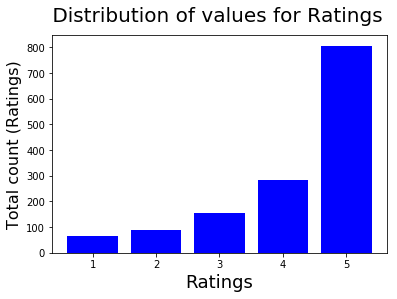

In [9]:
# Visualizing the values of the column Ratings as as bar graph
ratingsX = [1,2,3,4,5]

# In the cell above we saw that value_counts gives us the ratings in the descending order based on
# values and it seems that the ratings are only in reverse order that we need it to be
ratingsTotal = reviewsDF["Rating"].value_counts(ascending=True).tolist()

plt.figure().suptitle(' Distribution of values for Ratings', fontsize=20)
plt.bar(ratingsX, ratingsTotal, color="b", align="center")
plt.xlabel('Ratings', fontsize=18)
plt.ylabel('Total count (Ratings)', fontsize=16)

plt.savefig(path.join("..","images","RatingsBarGraph.png"))



# What can we discover about column Item ID?

In [60]:
# Let's get an idea of the type of data we are looking for
print(f"{reviewsDF['Item ID'].head()}\n")

# Checking to see if there are duplicates
print(f"{reviewsDF['Item ID'].value_counts()}\n")

itemsDF = pd.DataFrame({
    'Item ID' : reviewsDF['Item ID'].value_counts().index.values.tolist(),
    'Number Reviews' : reviewsDF['Item ID'].value_counts().values.tolist(),
    'Multiple Reviews': 0
})

print(itemsDF.head())

# Categorizing each item id as either 1 (single review) or 2 (more than one review) or leave as 0 reviews
itemsDF.loc[itemsDF['Number Reviews'] > 1, 'Multiple Reviews'] = 2
itemsDF.loc[itemsDF['Number Reviews'] == 1, 'Multiple Reviews'] = 1

print(itemsDF.head())

         Item ID  Number Reviews  Multiple Reviews
0     I784582779               4                 2
1     I549577846               3                 2
2     I872967861               3                 2
3     I763387169               3                 2
4     I671372897               3                 2
5     I833907167               2                 2
6     I545987364               2                 2
7     I475485781               2                 2
8     I264236145               2                 2
9     I835857013               2                 2
10    I741113174               2                 2
11    I787056386               2                 2
12    I225955774               2                 2
13    I404723077               2                 2
14    I347182602               2                 2
15    I920272844               2                 2
16    I396860630               2                 2
17    I514092360               2                 2
18    I553968675               

1    1224
2      85
Name: Multiple Reviews, dtype: int64


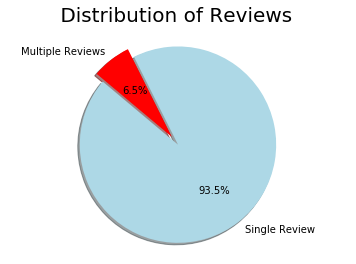

In [67]:
# checking distribution between single review and multiple reviews
print(itemsDF['Multiple Reviews'].value_counts())

# Preparing data to be presented as a pie graph
itemLabels = ['Single Review','Multiple Reviews']
reviewCount = itemsDF['Multiple Reviews'].value_counts().values.tolist()
colors = ['lightblue', 'red']
explode = (0.1,0)

# Creating graph with matplotlib
plt.figure().suptitle(' Distribution of Reviews', fontsize=20)
plt.pie(reviewCount, explode=explode, labels=itemLabels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.savefig(path.join("..","images","NumReviewsPieChart.png"))
plt.show()



# What can we discover about column Categories?

In [141]:
# Let's get an idea of the type of data we are looking for
print(f"{reviewsDF['Categories'].head()}\n")

# Checking to see if there are duplicates
print(f"{reviewsDF['Categories'].value_counts()}\n")

CategoriesDF = pd.DataFrame({
    'Categories' : reviewsDF['Categories'].value_counts().index.values.tolist(),
    'Number Categories' : reviewsDF['Categories'].value_counts().values.tolist(),
    'Multiple Categories': 0
})

print(CategoriesDF.head())

# Categorizing each Item as either 1 (Exact Categories) or leave as 0 no other has exact same categories in the exact same order
CategoriesDF.loc[CategoriesDF['Number Categories'] > 1, 'Multiple Categories'] = 1

print(CategoriesDF.head())

0    Clothing, Shoes & Jewelry#!#Women#!#Novelty, C...
1    Clothing, Shoes & Jewelry#!#Men#!#Surf, Skate ...
2    Clothing, Shoes & Jewelry#!#Women#!#Novelty, C...
3    Clothing, Shoes & Jewelry#!#Men#!#Accessories#...
4    Clothing, Shoes & Jewelry#!#Women#!#Clothing#!...
Name: Categories, dtype: object

Clothing, Shoes & Jewelry#!#Women#!#Novelty, Costumes & More#!#Novelty#!#Jewelry#!#Necklaces & Pendants                                                                                                                                                            23
Clothing, Shoes & Jewelry#!#Women#!#Clothing#!#Tops & Tees#!#Blouses & Button-Down Shirts                                                                                                                                                                          21
Clothing, Shoes & Jewelry#!#Women#!#Clothing#!#Dresses#!#Casual                                                                                                         

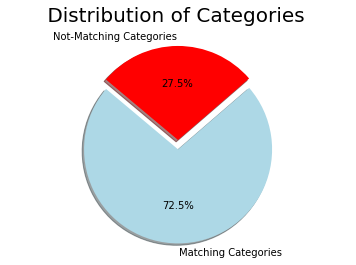

In [142]:
# Preparing data to be presented as a pie graph
CategoryLabels = ['Matching Categories','Not-Matching Categories']
CategoryCount = CategoriesDF['Multiple Categories'].value_counts().values.tolist()
colors = ['lightblue', 'red']
explode = (0.1,0)

# Creating graph with matplotlib
plt.figure().suptitle(' Distribution of Categories', fontsize=20)
plt.pie(CategoryCount, explode=explode, labels=CategoryLabels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.savefig(path.join("..","images","NumCategoriesPieChart.png"))
plt.show()

In [180]:
# Getting a unique categories to see how which are the most popular categories
rowsDict = dict()

for index, row in reviewsDF.iterrows():
    for subString in row[4].split("#!#"):
        if subString in rowsDict:
            rowsDict[subString] += 1
        else:
            rowsDict[subString] = 1
    
print(f"There are {len(rowsDict)} different categories in the dataset before cleaning")


# Turning the dictionary into a Dataframe to make manipulation easier
categoriesDF2 = pd.DataFrame({
    "Categories" : list(rowsDict.keys()),
    "Categories Count" : list(rowsDict.values())
    })

categoriesDF2.sort_values(by=['Categories'], inplace=True)
categoriesDF2.reset_index(drop=True, inplace=True)


# print(categoriesDF2['Categories'].value_counts())

categoryList = categoriesDF2['Categories'].values.tolist()

similarityList = list()

for category in categoryList:
    similarity = [category]
    for category2 in categoryList:
        if(SequenceMatcher(None, category, category2).ratio() >= 0.9 and not category==category2):
            similarity.append(category2)
    if(len(similarity)>1):
        similarityList.append(similarity)


print(similarityList[0])
print(similarityList[1])

There are 499 different categories in the dataset before cleaning
['Active Shorts', 'Active Skorts']
['Active Skorts', 'Active Shorts']


In [178]:
print(similarityList)

[['Active Shorts', 'Active Skorts'], ['Active Skorts', 'Active Shorts'], ["Men's Athletic Watches", "Women's Athletic Watches"], ['Strand', 'Strands'], ['Strands', 'Strand'], ["Women's Athletic Watches", "Men's Athletic Watches"]]


In [205]:

print(categoriesDF2.head())
categoriesDF2.sort_values(by=['Categories Count'], inplace=True, ascending=False)
categoriesDF2.reset_index(drop=True, inplace=True)
print(categoriesDF2.head(10))



                  Categories  Categories Count
0  Clothing, Shoes & Jewelry              1400
1                      Women               983
2                   Clothing               631
3                      Shoes               391
4                        Men               367
                                          Categories  Categories Count
0                          Clothing, Shoes & Jewelry              1400
1                                              Women               983
2                                           Clothing               631
3                                              Shoes               391
4                                                Men               367
5  Shoes & Accessories: International Shipping Av...               317
6                           Novelty, Costumes & More               266
7                                            Novelty               193
8                                        Accessories               146
9       

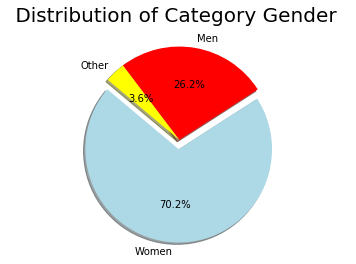

In [208]:
# Preparing data to be presented as a pie graph
CategoryLabels = ['Women','Men', 'Other']

CategoryCount = []
CategoryCount.append(categoriesDF2.loc[categoriesDF2['Categories'] == 'Women']['Categories Count'].values[0])
CategoryCount.append(categoriesDF2.loc[categoriesDF2['Categories'] == 'Men']['Categories Count'].values[0])
CategoryCount.append(1400 -(CategoryCount[0]+CategoryCount[1]))

colors = ['lightblue', 'red', 'yellow']
explode = (0.1,0,0)

# Creating graph with matplotlib
plt.figure().suptitle(' Distribution of Category Gender', fontsize=20)
plt.pie(CategoryCount, explode=explode, labels=CategoryLabels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.savefig(path.join("..","images","TargetGenderCategoryPieChart.png"))
plt.show()

# What have we learned up until now

## What type of data do we have?
```
- The dataset has 6 usable columns
- 1 'Unnamed 0' Columan that needed to be cleaned out
- 5 columns (excluding Ratings) are all text/object values
- The categories column still has Python lists in raw text form that need to be cleaned
- The entire dataset download from Kaggle has been pre-curated and contains NO NaN values
- We were able to obtain a datset with 1400 Amazon product reviews
```


## What are some Insights for the "Rating" column?
````
- The Rating column is the only one with numerical values
- The Ratings column has 5 discrete values 1 - 5 for its scoring
- We have a heavily skewed dataset leaning towards positive
````

## What are some Insights for the "ItemID" column?
````
- The Rating column has alfanumerical values
- I am assuming that each itemID represents a unique item, but multiple venders may have the sell the same item with different IDs
- We have a heavily skewed dataset leaning towards a single review per item, but seeing as how the Total subset only represent around .7% of the entire dataset then it is very likely that the 200K dataset has more items with mulitple reviews.
````

## What are some Insights for the "Categories" column?
````
- The Categories column initially had raw strings representing a list of list
- Surprisingly, my current dataset has around 70% or items matching the exact same categories in the exact same order and proportion
- We have highly skewed dataset with items having matching sets of categories attached to each other.
- This might signify that the Amazon 200K dataset is mostly composed of items of the same type and category.
- This dataset has more clothing targeting Women than Men and there are around 50 reviews for items not target only to Men or Women.

